<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 873
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 632.1+ KB


C:\Users\Isabelle\AppData\Local\Temp\ipykernel_12776\1738200846.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nhl['YearBorn'] = np.select(conditions, choices)
C:\Users\Isabelle\AppData\Local\Temp\ipykernel_12776\1738200846.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nhl["age"] = 2022 - nhl['YearBorn']
C:\Users\Isabelle\AppData\Local\Temp\ipykernel_12776\1738200846.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

R-squared: 0.6214
MAE: 0.4201
MSE: 0.2908
Feature age: 0.119284
Feature BMI: 0.030212
Feature GP: 0.267980
Feature G/GP: 0.036748
Feature A/GP: 0.206868
Feature +/-: 0.018720
Feature PIM/GP: 0.014535
Feature SH%: 0.011715
Feature SV%: 0.012615
Feature iSCF/GP: 0.019449
Feature iHF/GP: 0.017363
Feature iHA/GP: 0.014735
Feature iMiss/GP: 0.057955
Feature iGVA/GP: 0.041435
Feature iTKA/GP: 0.012914
Feature BLK%: 0.014656
Feature FO%: 0.006487
Feature %FOT: 0.012514
Feature iPEND/GP: 0.010421
Feature GA/GP: 0.061510
Feature Hand_R: 0.002387
Feature Position_C/D: 0.000000
Feature Position_C/LW: 0.000726
Feature Position_C/LW/C: 0.000000
Feature Position_C/LW/RW: 0.001007
Feature Position_C/RW: 0.000211
Feature Position_C/RW/LW: 0.000207
Feature Position_D: 0.000199
Feature Position_D/RW: 0.000006
Feature Position_LW: 0.001905
Feature Position_LW/C: 0.000600
Feature Position_LW/C/RW: 0.002511
Feature Position_LW/RW: 0.000211
Feature Position_LW/RW/C: 0.000111
Feature Position_RW: 0.000571
Fe

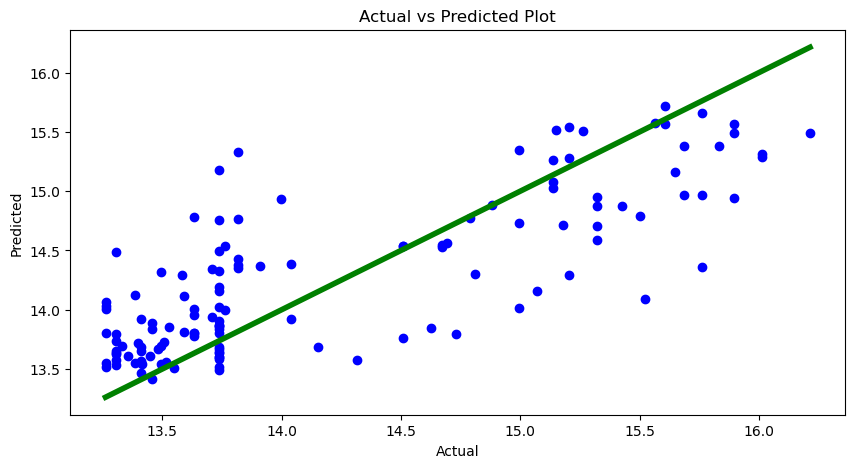

In [2]:
##Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#import data
nhl = pd.read_excel("./NHL data.xlsx")
nhl.info()

##Prepare data

#Eliminate rows in dataset with missing data
nhl=nhl.dropna()
nhl.info()

#add Goals per Game
nhl["G/GP"] = nhl["G"]/nhl["GP"]

#add Assist per Game
nhl["A/GP"] = nhl["A"]/nhl["GP"]

#add the year the players were born
nhl['BornInt'] = nhl['Born'].str.replace('\W', '', regex=True)
nhl=nhl.dropna()
nhl = nhl.astype({'BornInt':'int'})
conditions = [
    (nhl['BornInt'] < 10000),
    (nhl['BornInt'] >= 10000) & (nhl['BornInt'] < 100000),
    (nhl['BornInt'] >= 100000)]
choices = [2000,nhl['BornInt']//10000+2000, nhl['BornInt']//10000+1900]
nhl['YearBorn'] = np.select(conditions, choices)
del nhl['BornInt']

#add players age
nhl["age"] = 2022 - nhl['YearBorn']

#add BMI (Body Mass Index)
nhl = nhl.astype({'Ht':'int'})
nhl = nhl.astype({'Wt':'int'})
nhl["WtInKg"] = nhl["Wt"]*0.453592
nhl["HtInCm"] = nhl["Ht"]*2.54
nhl["HtInCm^2"] = nhl["HtInCm"]*nhl["HtInCm"]
nhl["BMI"] = nhl["Wt"]*nhl["HtInCm^2"]
del nhl['WtInKg']
del nhl['HtInCm']
del nhl['HtInCm^2']

#adding adjusted +/-
nhl["Adjusted +/-"] = nhl["+/-"]-nhl["E+/-"]

#adding penatlties (in minutes) per game
nhl["PIM/GP"] = nhl["PIM"]/nhl["GP"]

#adding unblocked shot attempts (Fenwick, USAT) taken by this individual per game
nhl["iFF/GP"] = nhl["iFF"]/nhl["GP"]

#adding shots on goal taken by this individual per game
nhl["iSF/GP"] = nhl["iSF"]/nhl["GP"]

#adding expected goals (weighted shots) for this individual per game
nhl["ixG/GP"] = nhl["ixG"]/nhl["GP"]

#adding all scoring chances taken by this individual per game
nhl["iSCF/GP"] = nhl["iSCF"]/nhl["GP"]

#adding an estimate of the player's setup passes (passes that result in a shot attempt) per game
nhl["Pass/GP"] = nhl["Pass"]/nhl["GP"]

#adding hits thrown by this individual per game
nhl["iHF/GP"] = nhl["iHF"]/nhl["GP"]

#adding hits taken by this individual per game
nhl["iHA/GP"] = nhl["iHA"]/nhl["GP"]

#adding individual shots taken that missed the net per game
nhl["iMiss/GP"] = nhl["iMiss"]/nhl["GP"]

#adding giveaways by this individual per game
nhl["iGVA/GP"] = nhl["iGVA"]/nhl["GP"]

#adding takeaways by this individual per game
nhl["iTKA/GP"] = nhl["iTKA"]/nhl["GP"]

#adding shots blocked by this individual per game
nhl["iBLK/GP"] = nhl["iBLK"]/nhl["GP"]

#adding penalties drawn by this individual per game
nhl["iPEND/GP"] = nhl["iPEND"]/nhl["GP"]

#adding penalties taken by this individual per game
nhl["iPENT/GP"] = nhl["iPENT"]/nhl["GP"]

#adding the team's scoring chances while this player was on the ice per game
nhl["SCF/GP"] = nhl["SCF"]/nhl["GP"]

#adding scoring chances allowed while this player was on the ice per game
nhl["SCA/GP"] = nhl["SCA"]/nhl["GP"]

#adding the team's goals while this player was on the ice
nhl["GF/GP"] = nhl["GF"]/nhl["GP"]

#adding goals allowed while this player was on the ice
nhl["GA/GP"] = nhl["GA"]/nhl["GP"]


#overview of the dataframe
nhl.info

##Prepare data for predicting the value of players

#selecting values of the dataset relevant to the prediction for the player's value
nhlSalaryPrediction = nhl[['Salary', 'age', 'BMI', 'Hand', 'Position', 'GP', 'G/GP', 'A/GP', '+/-', 'Adjusted +/-', 'PIM/GP', 'SH%', 'SV%', 'iFF/GP', 'iSF/GP', 'ixG/GP', 'iSCF/GP', 'Pass/GP', 'iHF/GP', 'iHA/GP', 'iMiss/GP', 'iGVA/GP', 'iTKA/GP', 'iBLK/GP', 'BLK%', 'FO%', '%FOT', 'iPENT/GP', 'iPEND/GP', 'SCF/GP', 'SCA/GP', 'GF/GP', 'GA/GP']]

#ckecking correlation between the selected stats for the valuation of the players
nhlSalaryPrediction.corr()

#checking wich stats have a correlation >0.7 (risk to distort the prediction model)
c = nhlSalaryPrediction.corr().abs()
s = c.unstack()
s = s[s<1]
s = s[s>0.7]
s.sort_values().drop_duplicates()

#Eliminate too strongly correlated stats to optimize the prediction model
del nhlSalaryPrediction['SCF/GP']
del nhlSalaryPrediction['SCA/GP']
del nhlSalaryPrediction['Adjusted +/-']
del nhlSalaryPrediction['iSF/GP']
del nhlSalaryPrediction['Pass/GP']
del nhlSalaryPrediction['GF/GP']
del nhlSalaryPrediction['ixG/GP']
del nhlSalaryPrediction['iBLK/GP']
del nhlSalaryPrediction['iPENT/GP']
del nhlSalaryPrediction['iFF/GP']

#Convert "Hand" and "Position" to dummy variable
nhlSalaryPrediction = pd.get_dummies(nhlSalaryPrediction, columns=['Hand'], drop_first=True)
nhlSalaryPrediction = pd.get_dummies(nhlSalaryPrediction, columns=['Position'], drop_first=True)

##RANDOM FOREST MODEL

#Create a variable for the logarithmized salary
nhlSalaryPrediction_log = nhlSalaryPrediction.copy()
nhlSalaryPrediction_log["logSalary"] = np.log(nhlSalaryPrediction["Salary"])
del nhlSalaryPrediction_log["Salary"]

#splitting dataset to training and test dataset
nhl_train_log, nhl_test_log = train_test_split(nhlSalaryPrediction_log, test_size=0.25, random_state=42)

#checking training dataset
nhl_train_log

# Create the random forest model
rf_log_model = RandomForestRegressor(n_estimators=100)

# Train the model using the training data
y = nhl_train_log["logSalary"]
x = nhl_train_log.loc[:, nhl_train_log.columns != 'logSalary']
rf_log_model.fit(x, y)

# Use the model to make predictions on the test data
y_test = nhl_test_log["logSalary"]
X_test = nhl_test_log.loc[:, nhl_test_log.columns != 'logSalary']
predictions_Salary_with_log = rf_log_model.predict(X_test)

#List of metric names
metric_names = ["R-squared", "MAE", "MSE"]

#List of metric functions
metric_functions = [metrics.r2_score, metrics.mean_absolute_error, metrics.mean_squared_error]


#Calculate RMSE
rmse_log_sal = sqrt(mean_squared_error(y_test, predictions_Salary_with_log))

# print the metrics         
for metric_name, metric_function in zip(metric_names, metric_functions):
  value = metric_function(y_test, predictions_Salary_with_log)
  print(f"{metric_name}: {value:.4f}")

# print the importance of each feature
importances = rf_log_model.feature_importances_
for i, importance in enumerate(importances):
    feature_name = nhl_train_log.columns[i]
    print("Feature %s: %f" % (feature_name, importance))
    
#Creating an Actual vs. Predicted Plot
def actual_vs_predicted_plot(y_test, prediction_Salary_test):
  min_value=np.array([y_test.min(), predictions_Salary_with_log.min()]).min()
  max_value=np.array([y_test.max(), predictions_Salary_with_log.max()]).max()
  fig, ax = plt.subplots(figsize=(10,5))
  ax.scatter(y_test,predictions_Salary_with_log, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_title("Actual vs Predicted Plot")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

#Displaying Actual vs. Predicted Plot
actual_vs_predicted_plot(y_test, predictions_Salary_with_log)

#Predicting the salary for the entire dataset / for all players (RF with log salaries)

#creating variable for logarithm of salary
nhlFinalSalaryPrediction = nhlSalaryPrediction.copy()
nhlFinalSalaryPrediction["logSalary"] = np.log(nhlFinalSalaryPrediction["Salary"])
del nhlFinalSalaryPrediction["Salary"]

#Predicting salary (value of players)
y = nhlFinalSalaryPrediction["logSalary"]
X = nhlFinalSalaryPrediction.loc[:, nhlFinalSalaryPrediction.columns != 'logSalary']
predictions_Salary = rf_log_model.predict(X)
predictions_Salary_final = np.exp(predictions_Salary)
predictions_Salary_final

#adding Value of Players (predicted Salaries based on their stats) and the difference in valuation (overpaid or underpaid) to the main dataset
nhlFinal=nhl.copy()
nhlFinal["Player Value"] = predictions_Salary_final
nhlFinal["Difference in valuation"] = nhlFinal["Player Value"] - nhlFinal["Salary"]

#Overview of final dataset
nhlFinal

#Write nhlFinal dataframe to a CSV file
nhlFinal.to_csv("nhl_final.csv")
